In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape the input data to have a single channel (grayscale)
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Convert the labels to categorical format
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)


4422102/4422102 [==============================] - 1s 0us/step


In [3]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [4]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.1)


Epoch 1/10
422/422 [==============================] - 46s 102ms/step - loss: 0.5756 - accuracy: 0.7921 - val_loss: 0.4054 - val_accuracy: 0.8552
Epoch 2/10
422/422 [==============================] - 42s 101ms/step - loss: 0.3698 - accuracy: 0.8681 - val_loss: 0.3447 - val_accuracy: 0.8770
Epoch 3/10
422/422 [==============================] - 43s 102ms/step - loss: 0.3235 - accuracy: 0.8837 - val_loss: 0.3161 - val_accuracy: 0.8887
Epoch 4/10
422/422 [==============================] - 43s 102ms/step - loss: 0.2948 - accuracy: 0.8930 - val_loss: 0.3024 - val_accuracy: 0.8900
Epoch 5/10
422/422 [==============================] - 42s 100ms/step - loss: 0.2714 - accuracy: 0.9012 - val_loss: 0.2858 - val_accuracy: 0.8958
Epoch 6/10
422/422 [==============================] - 42s 100ms/step - loss: 0.2545 - accuracy: 0.9077 - val_loss: 0.2754 - val_accuracy: 0.9008
Epoch 7/10
422/422 [==============================] - 43s 101ms/step - loss: 0.2384 - accuracy: 0.9131 - val_loss: 0.2658 - val_ac

In [5]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')


313/313 [==============================] - 4s 13ms/step - loss: 0.2776 - accuracy: 0.8983
Test accuracy: 0.8982999920845032


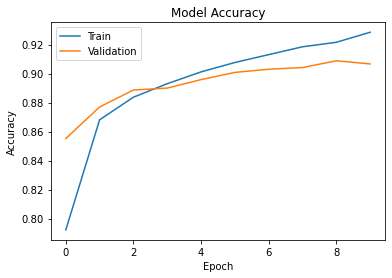

In [6]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()




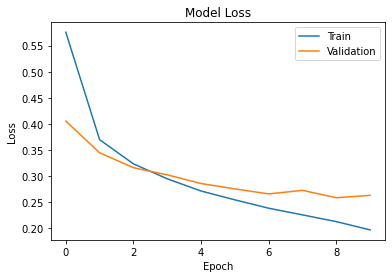

In [7]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()